## Additional Data Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
matplotlib.rcParams.update({'font.size': 7})
%config InlineBackend.figure_format = 'png2x'

In [3]:
# read in datasets 
metadata = pd.read_pickle('./datasets/metadata.pkl')
genres = pd.read_pickle('./datasets/genres.pkl')
genres.columns = np.load('./datasets/genre_names.npy')

### Analyzing Feature Relationships

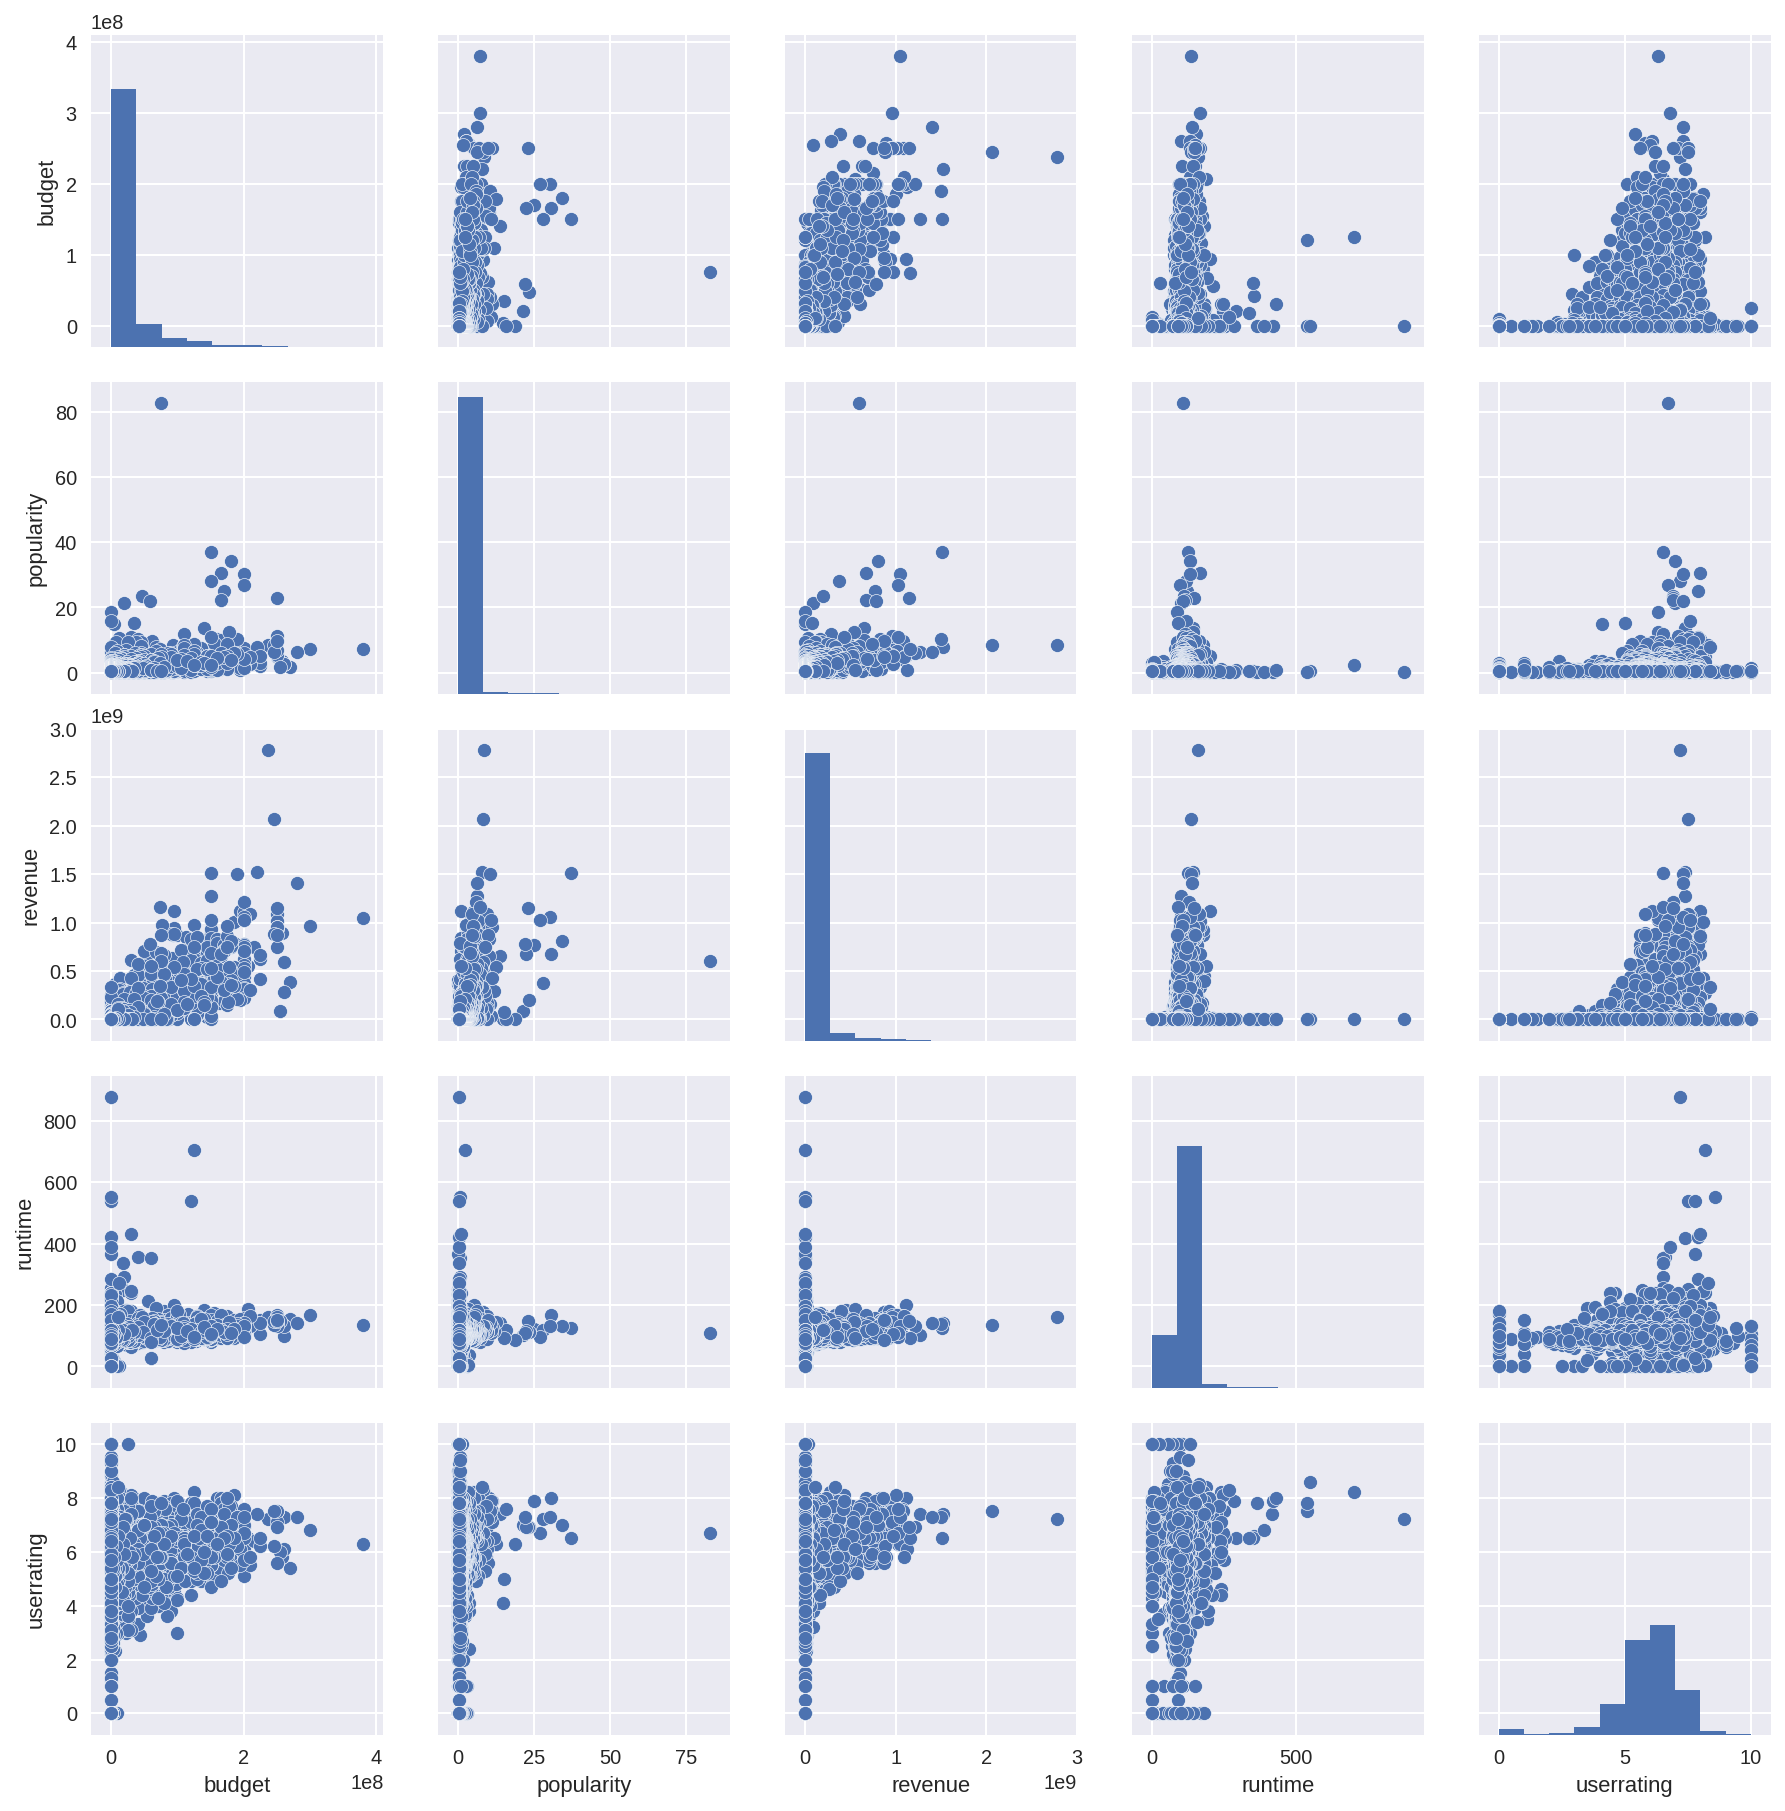

In [4]:
# pair plot of budget, popularity, revenue, runtime, userrating
sns.pairplot(metadata.iloc[:, :5]); plt.show()

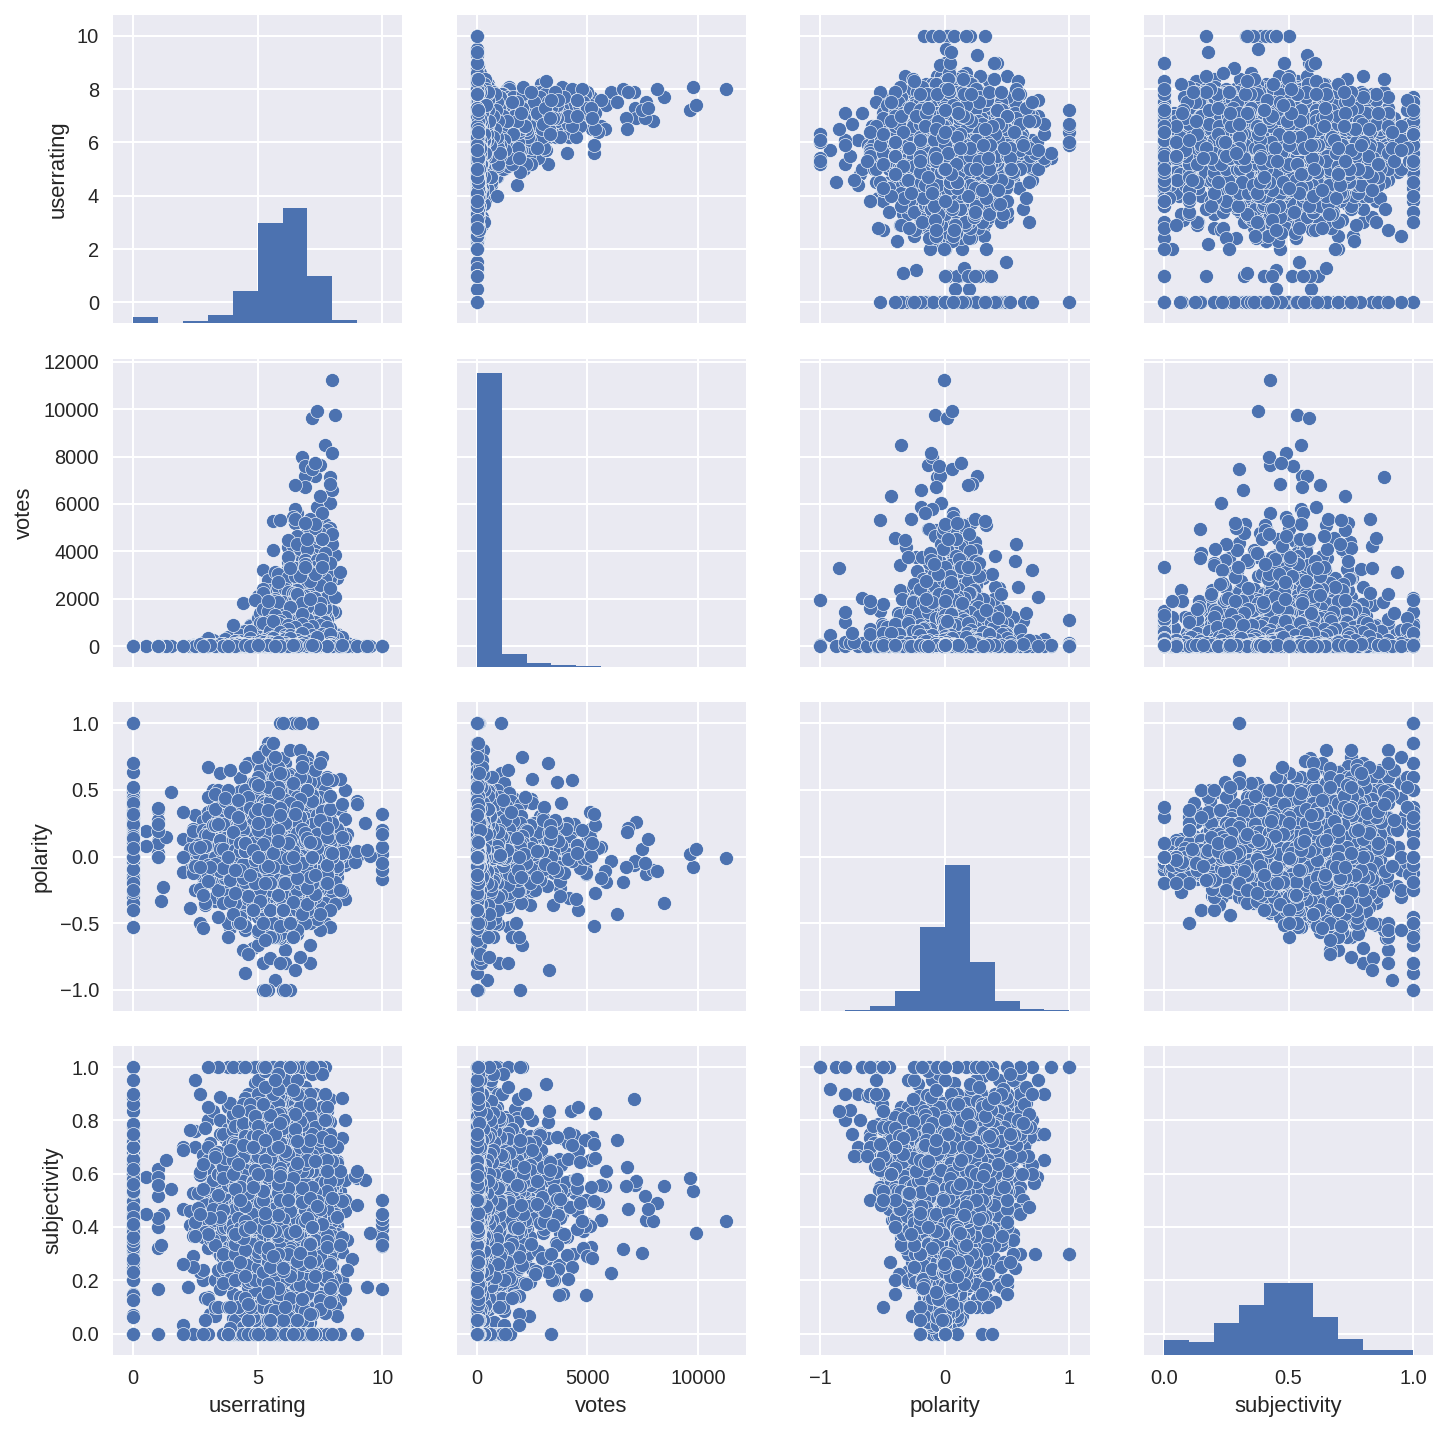

In [5]:
# pair plot of user rating, votes, polarity, subjectivity
sns.pairplot(metadata.iloc[:, 4:8]); plt.show()

### Understanding Distribution of Subjectivity

In [6]:
subjectivity_mat = pd.DataFrame(columns=genres.columns, index=genres.index)
indices = genres.index

# iterate through genres dataframe
# put a movie's subjectivity score under every genre column in subjectivity matrix that the movie is labeled as 
for ind in genres.index:
    temp = []
    for col in genres.columns:
        if genres.loc[ind][col] == 0:
            temp.append(np.NaN)
        else:
            temp.append(metadata.loc[ind]['subjectivity'])
    subjectivity_mat.loc[ind] = temp

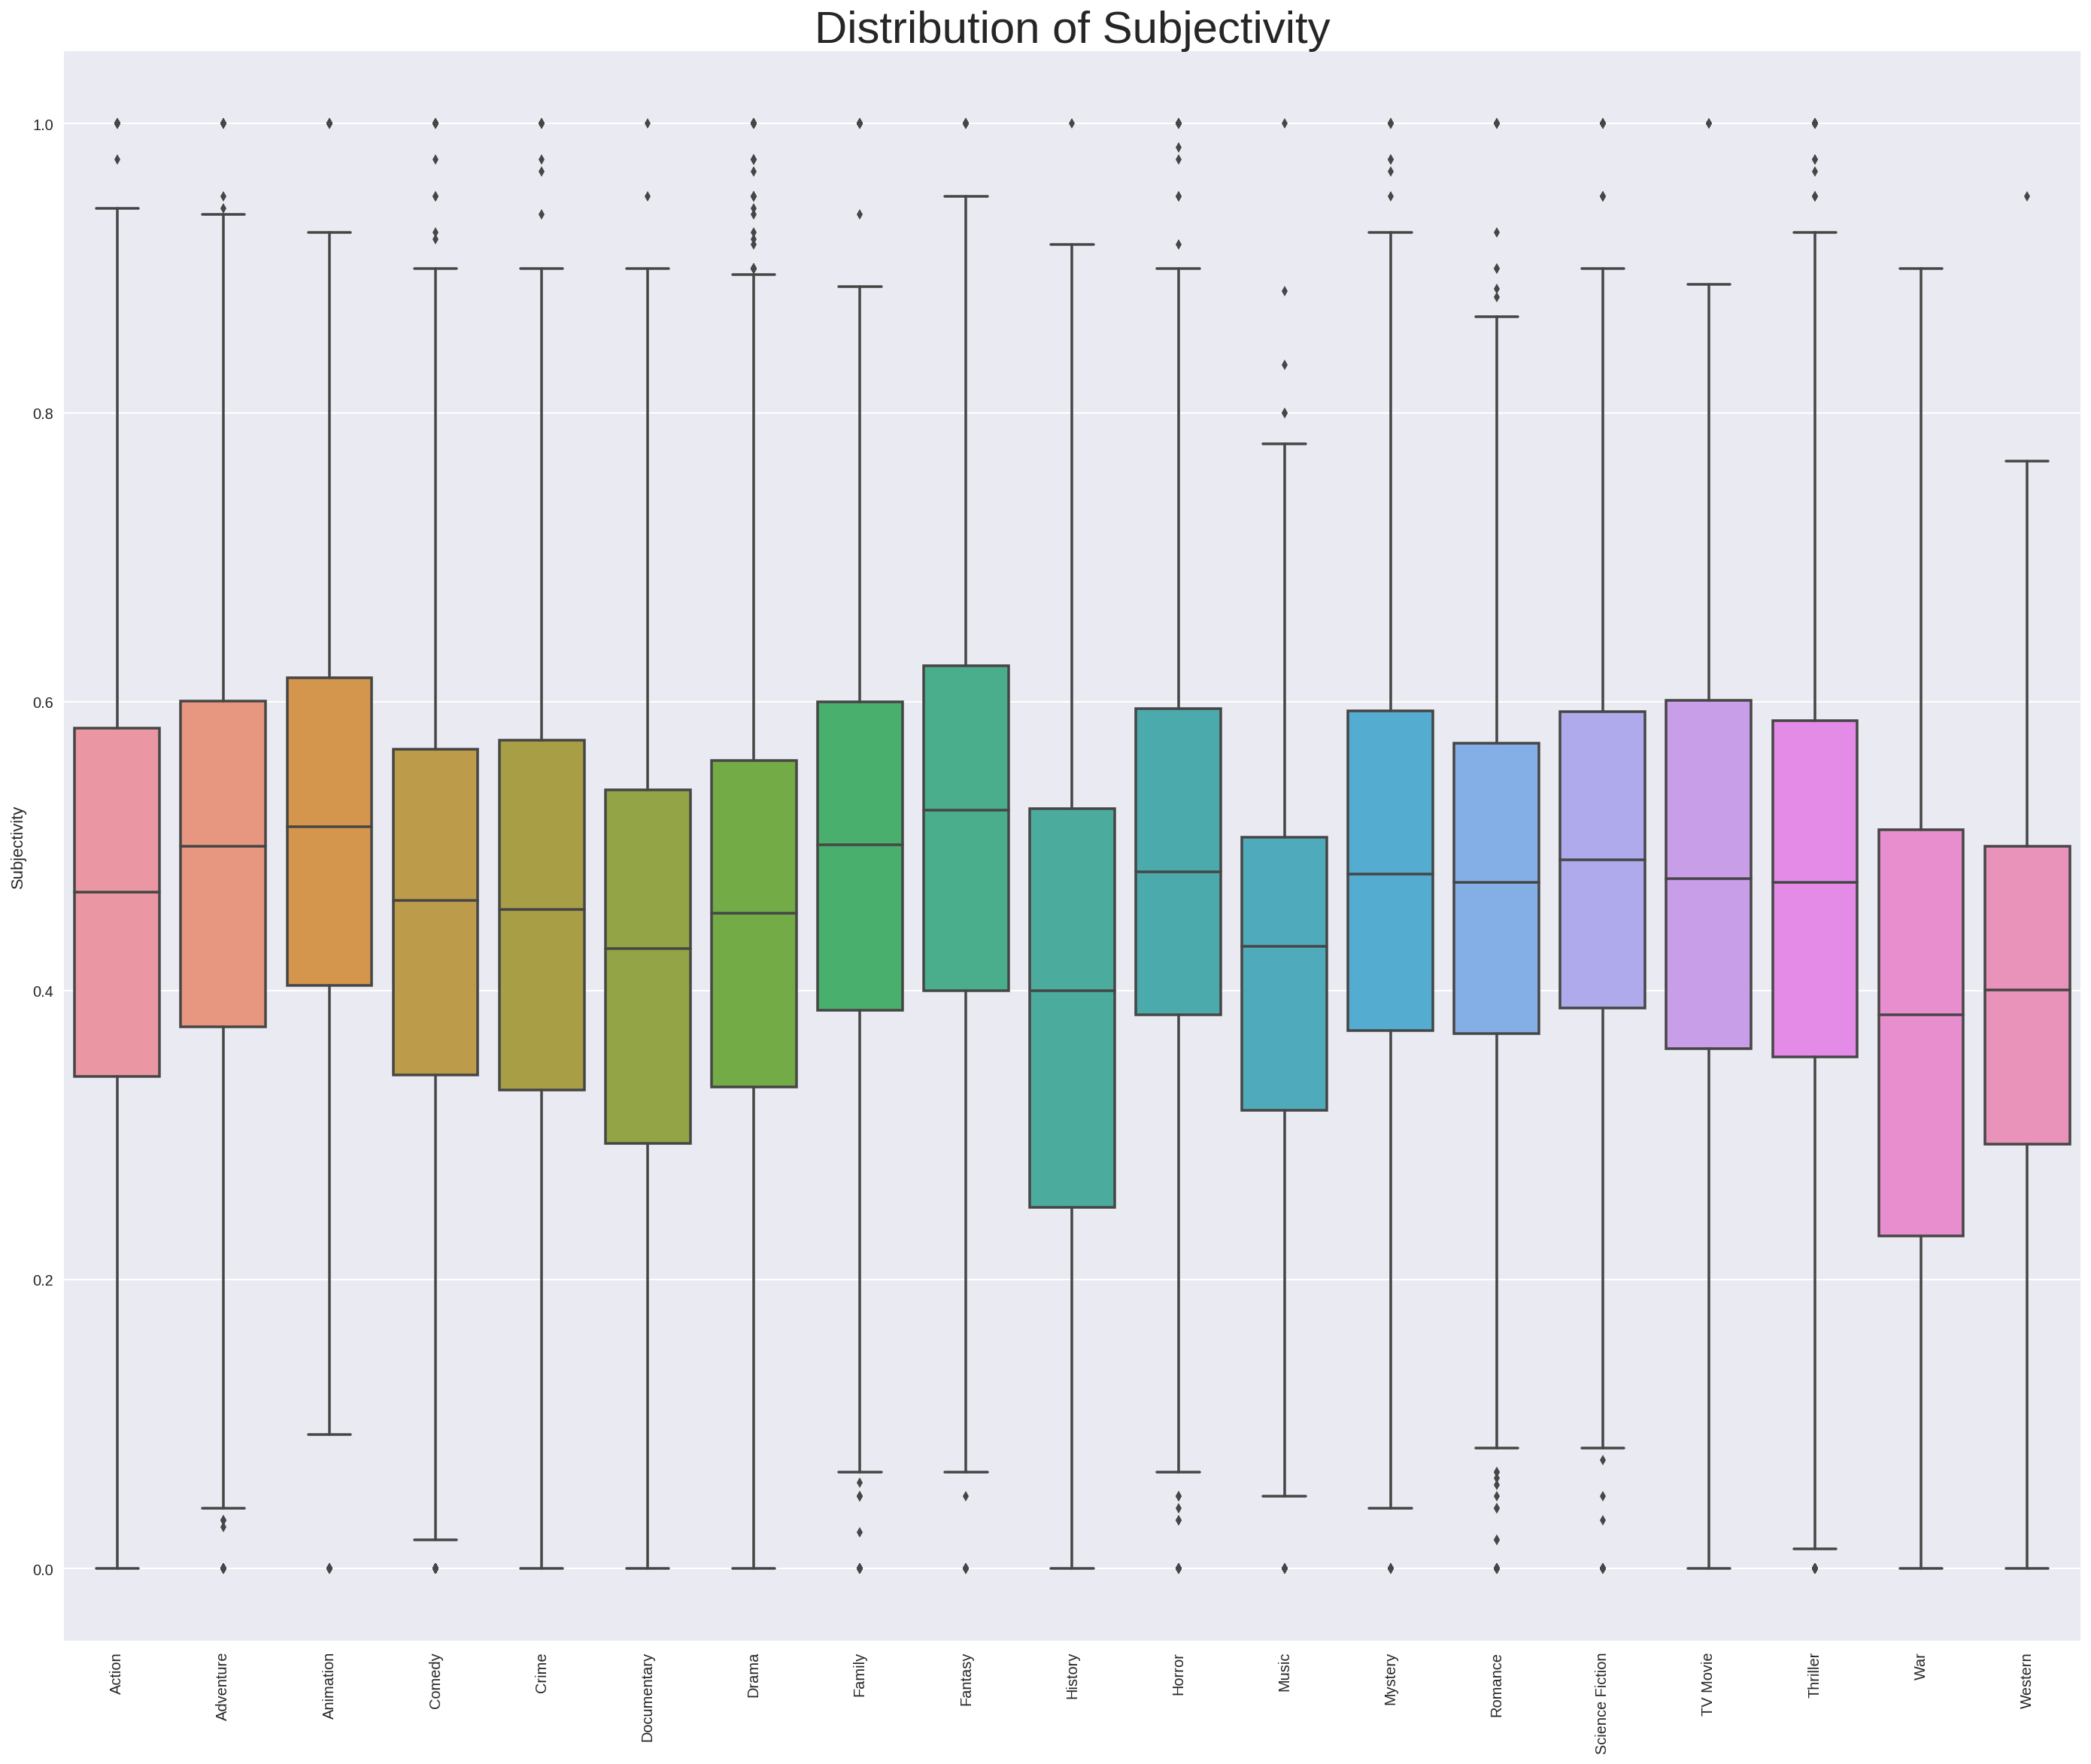

In [7]:
# boxplot of subjectivity distribution per genre 
_, ax1 = plt.subplots(1, 1, figsize=(20, 17))

sns.set(font_scale=2.5)
ax1 = sns.boxplot(data=subjectivity_mat)
ax1.set_ylabel('Subjectivity')
ax1.set_title('Distribution of Subjectivity')

plt.xticks(range(genres.shape[1]), genres.columns, rotation=90)
plt.tight_layout(); plt.show()

In [8]:
# another empty subjectivity matrix
subjectivity_mat1 = pd.DataFrame(columns=genres.columns, index=genres.index)
indices = genres.index
# this time, only if a movie has JUST 1 label, input its subjectivity score into subjectivity matrix 
# this ensures that the subjectivity distribution is very specific to the genre
for ind in genres.index:
    temp = []
    if genres.loc[ind].sum() == 1:
        for col in genres.columns:
            if genres.loc[ind][col] == 0:
                temp.append(np.NaN)
            else:
                temp.append(metadata.loc[ind]['subjectivity'])
        subjectivity_mat1.loc[ind] = temp
        
genres.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,
77,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
98,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
107,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8358,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9741,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


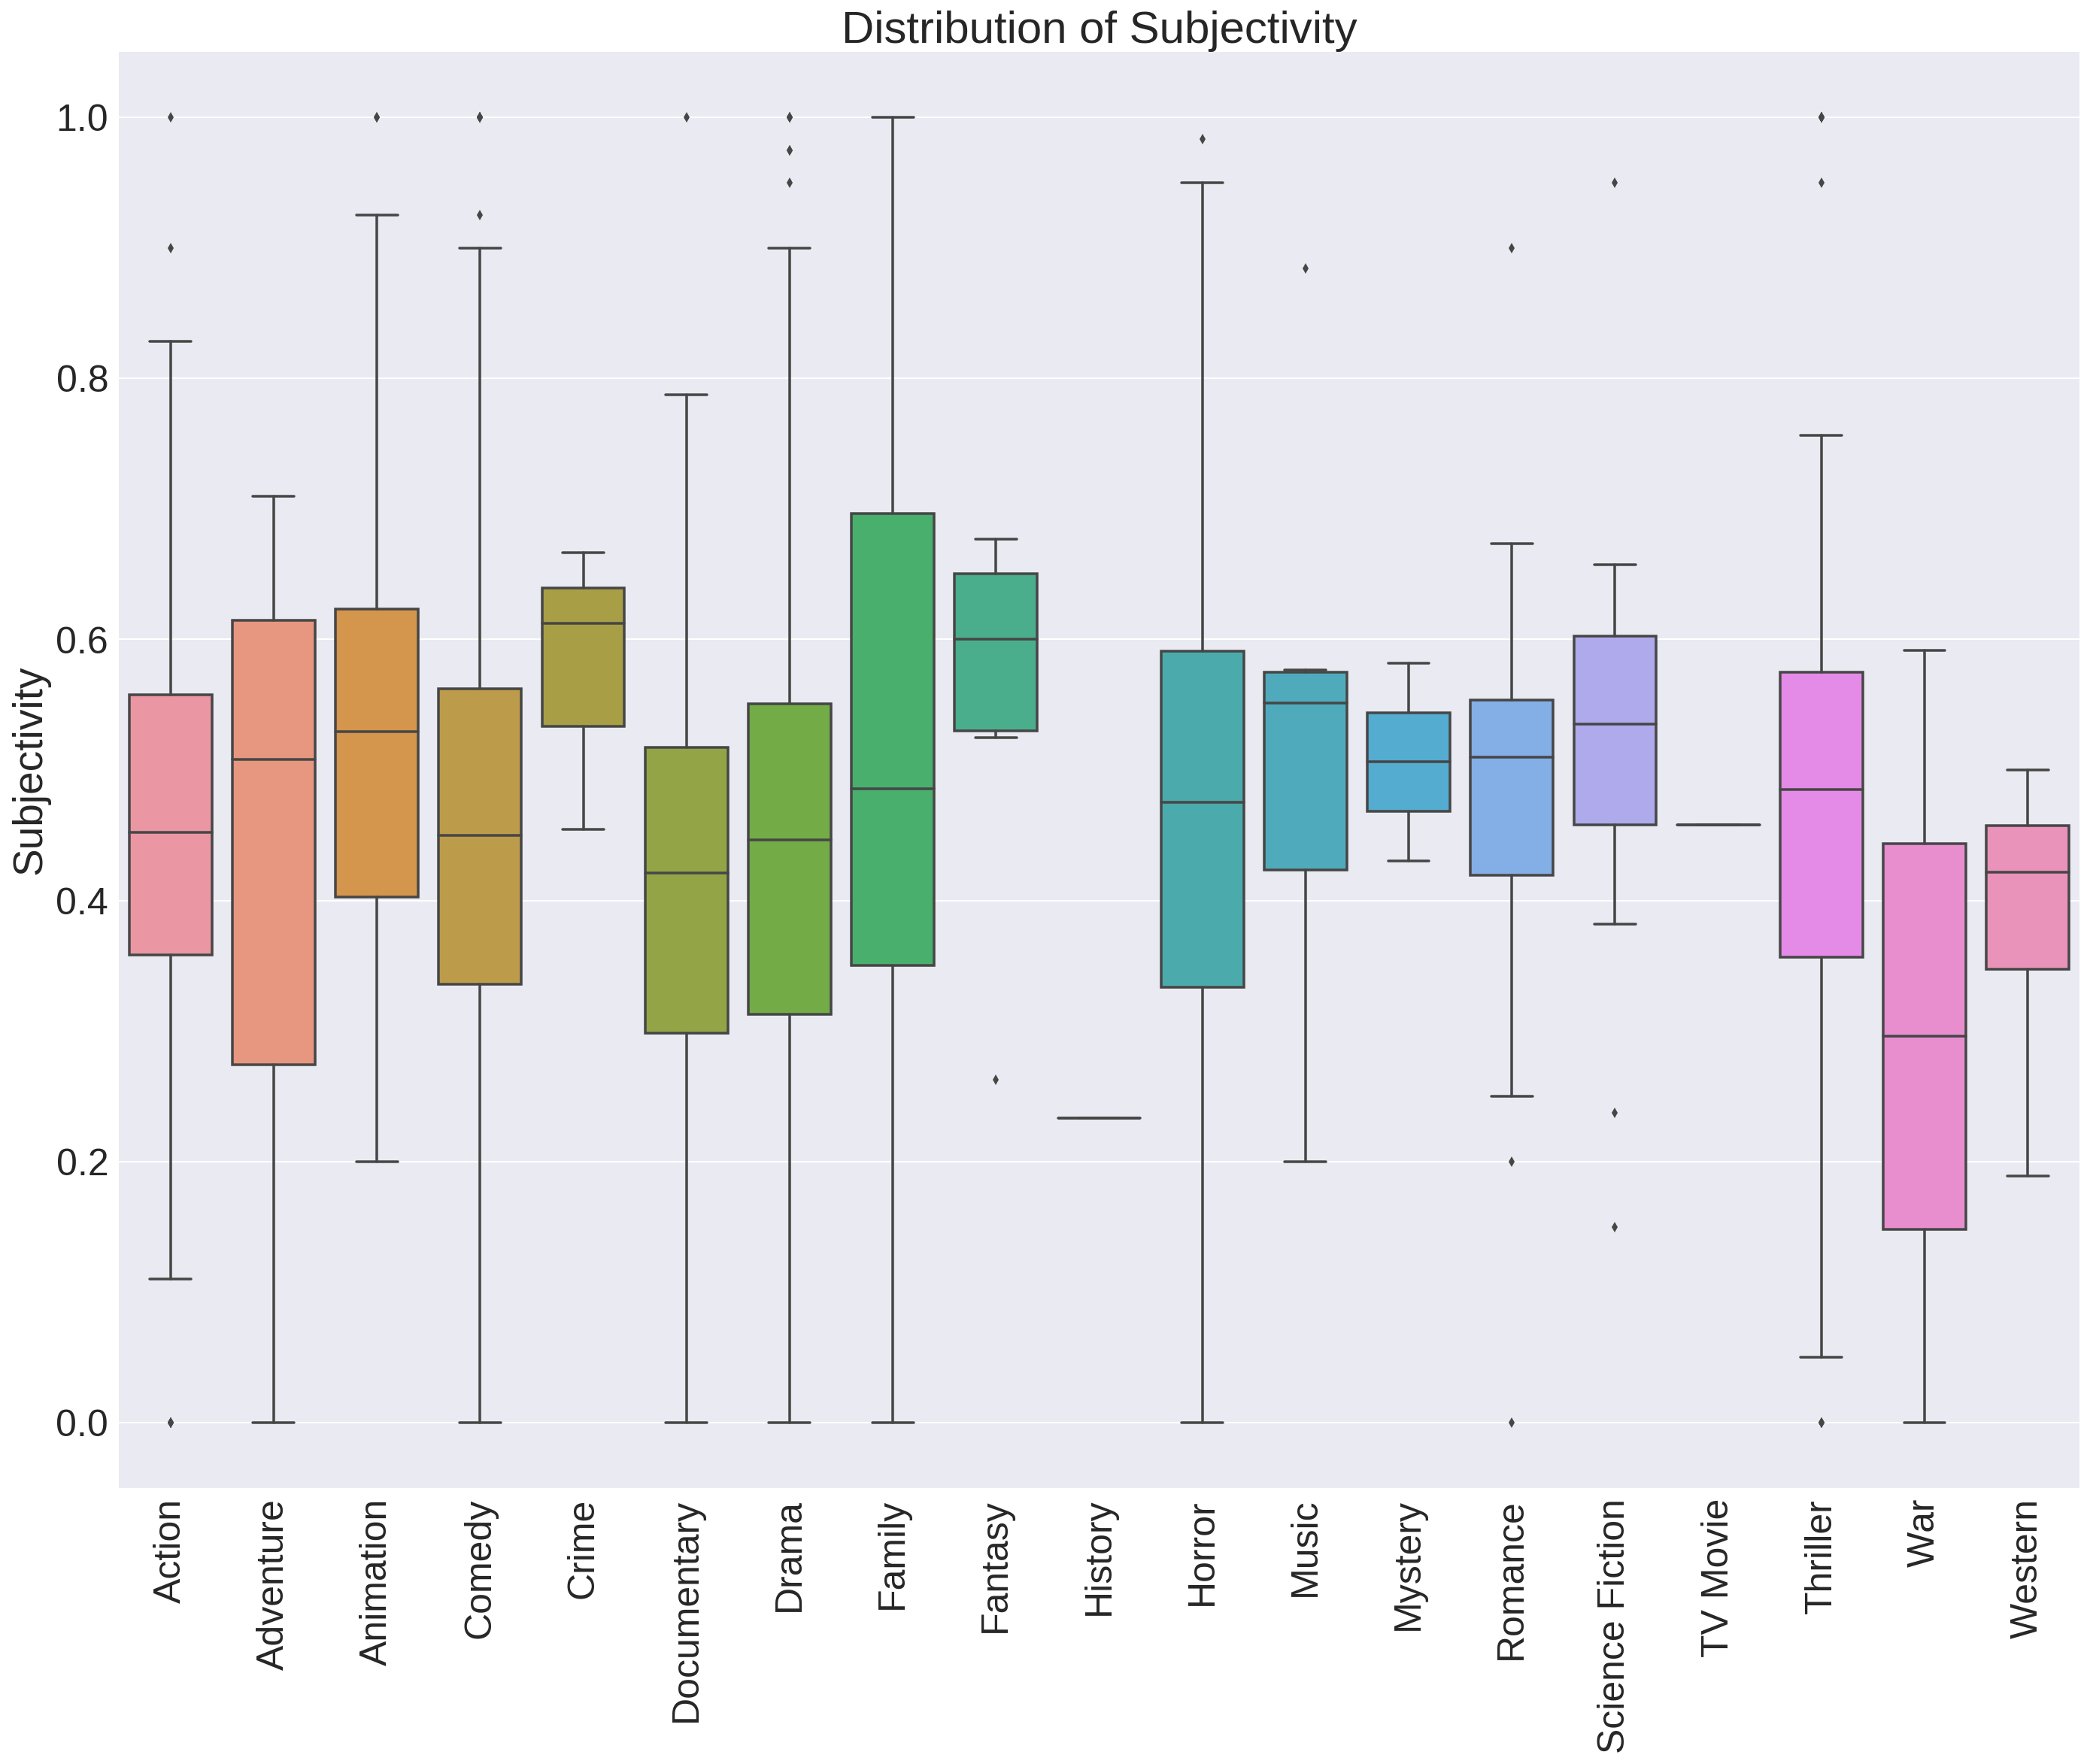

In [9]:
# boxplot of revised subjectivity distribution per genre 
_, ax1 = plt.subplots(1, 1, figsize=(20, 17))

sns.set(font_scale=2.5)
ax1 = sns.boxplot(data=subjectivity_mat1)
ax1.set_ylabel('Subjectivity')
ax1.set_title('Distribution of Subjectivity')

plt.xticks(range(genres.shape[1]), genres.columns, rotation=90)
plt.tight_layout(); plt.show()

### Understanding Distribution of Polarity 

In [10]:
polarity_mat = pd.DataFrame(columns=genres.columns, index=genres.index)
indices = genres.index

# iterate through genres dataframe
# put a movie's polarity score under every genre column in polarity matrix that the movie is labeled as 
for ind in genres.index:
    temp = []
    for col in genres.columns:
        if genres.loc[ind][col] == 0:
            temp.append(np.NaN)
        else:
            temp.append(metadata.loc[ind]['polarity'])
    polarity_mat.loc[ind] = temp

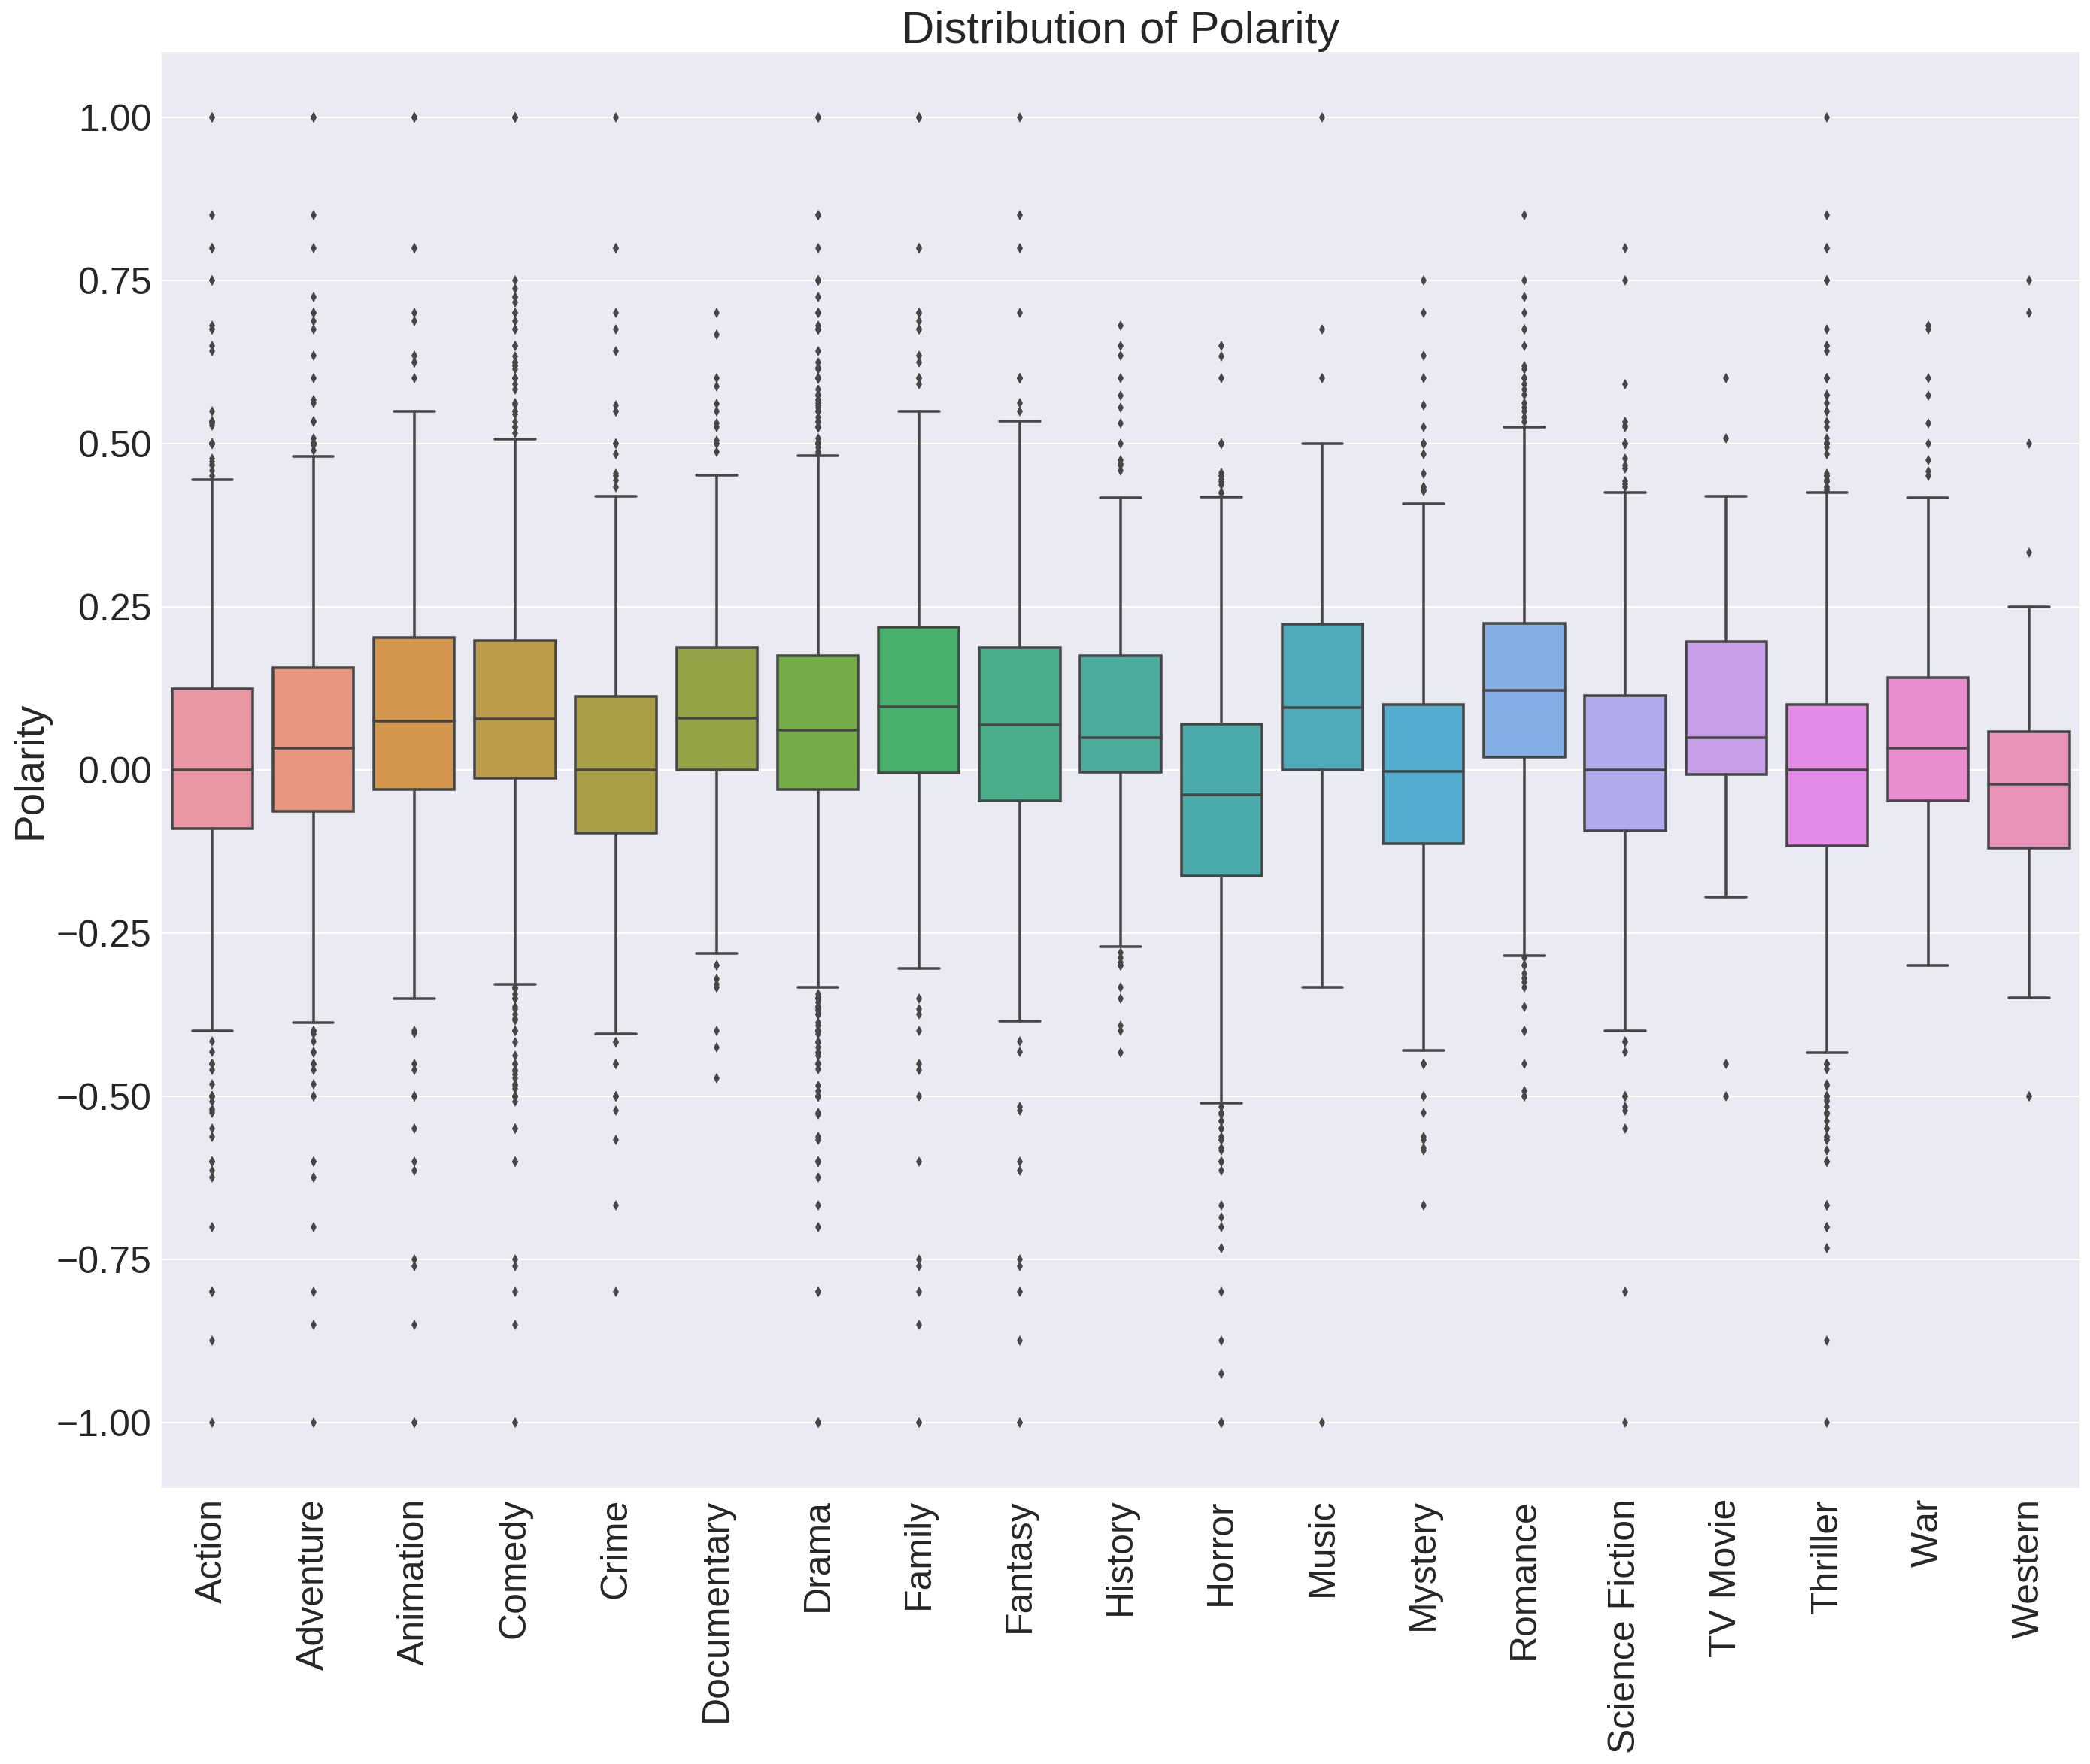

In [11]:
# boxplot of polarity distribution per genre 
_, ax1 = plt.subplots(1, 1, figsize=(20, 17))

sns.set(font_scale=2.5)
ax1 = sns.boxplot(data=polarity_mat)
ax1.set_ylabel('Polarity')
ax1.set_title('Distribution of Polarity')

plt.xticks(range(genres.shape[1]), genres.columns, rotation=90)
plt.tight_layout(); plt.show()

In [12]:
# this time, only if a movie has JUST 1 label, input its polarity score into subjectivity matrix 
# this ensures that the polarity distribution is very specific to the genre
polarity_mat1 = pd.DataFrame(columns=genres.columns, index=genres.index)
indices = genres.index
for ind in genres.index:
    temp = []
    if genres.loc[ind].sum() == 1:
        for col in genres.columns:
            if genres.loc[ind][col] == 0:
                temp.append(np.NaN)
            else:
                temp.append(metadata.loc[ind]['polarity'])
        polarity_mat1.loc[ind] = temp

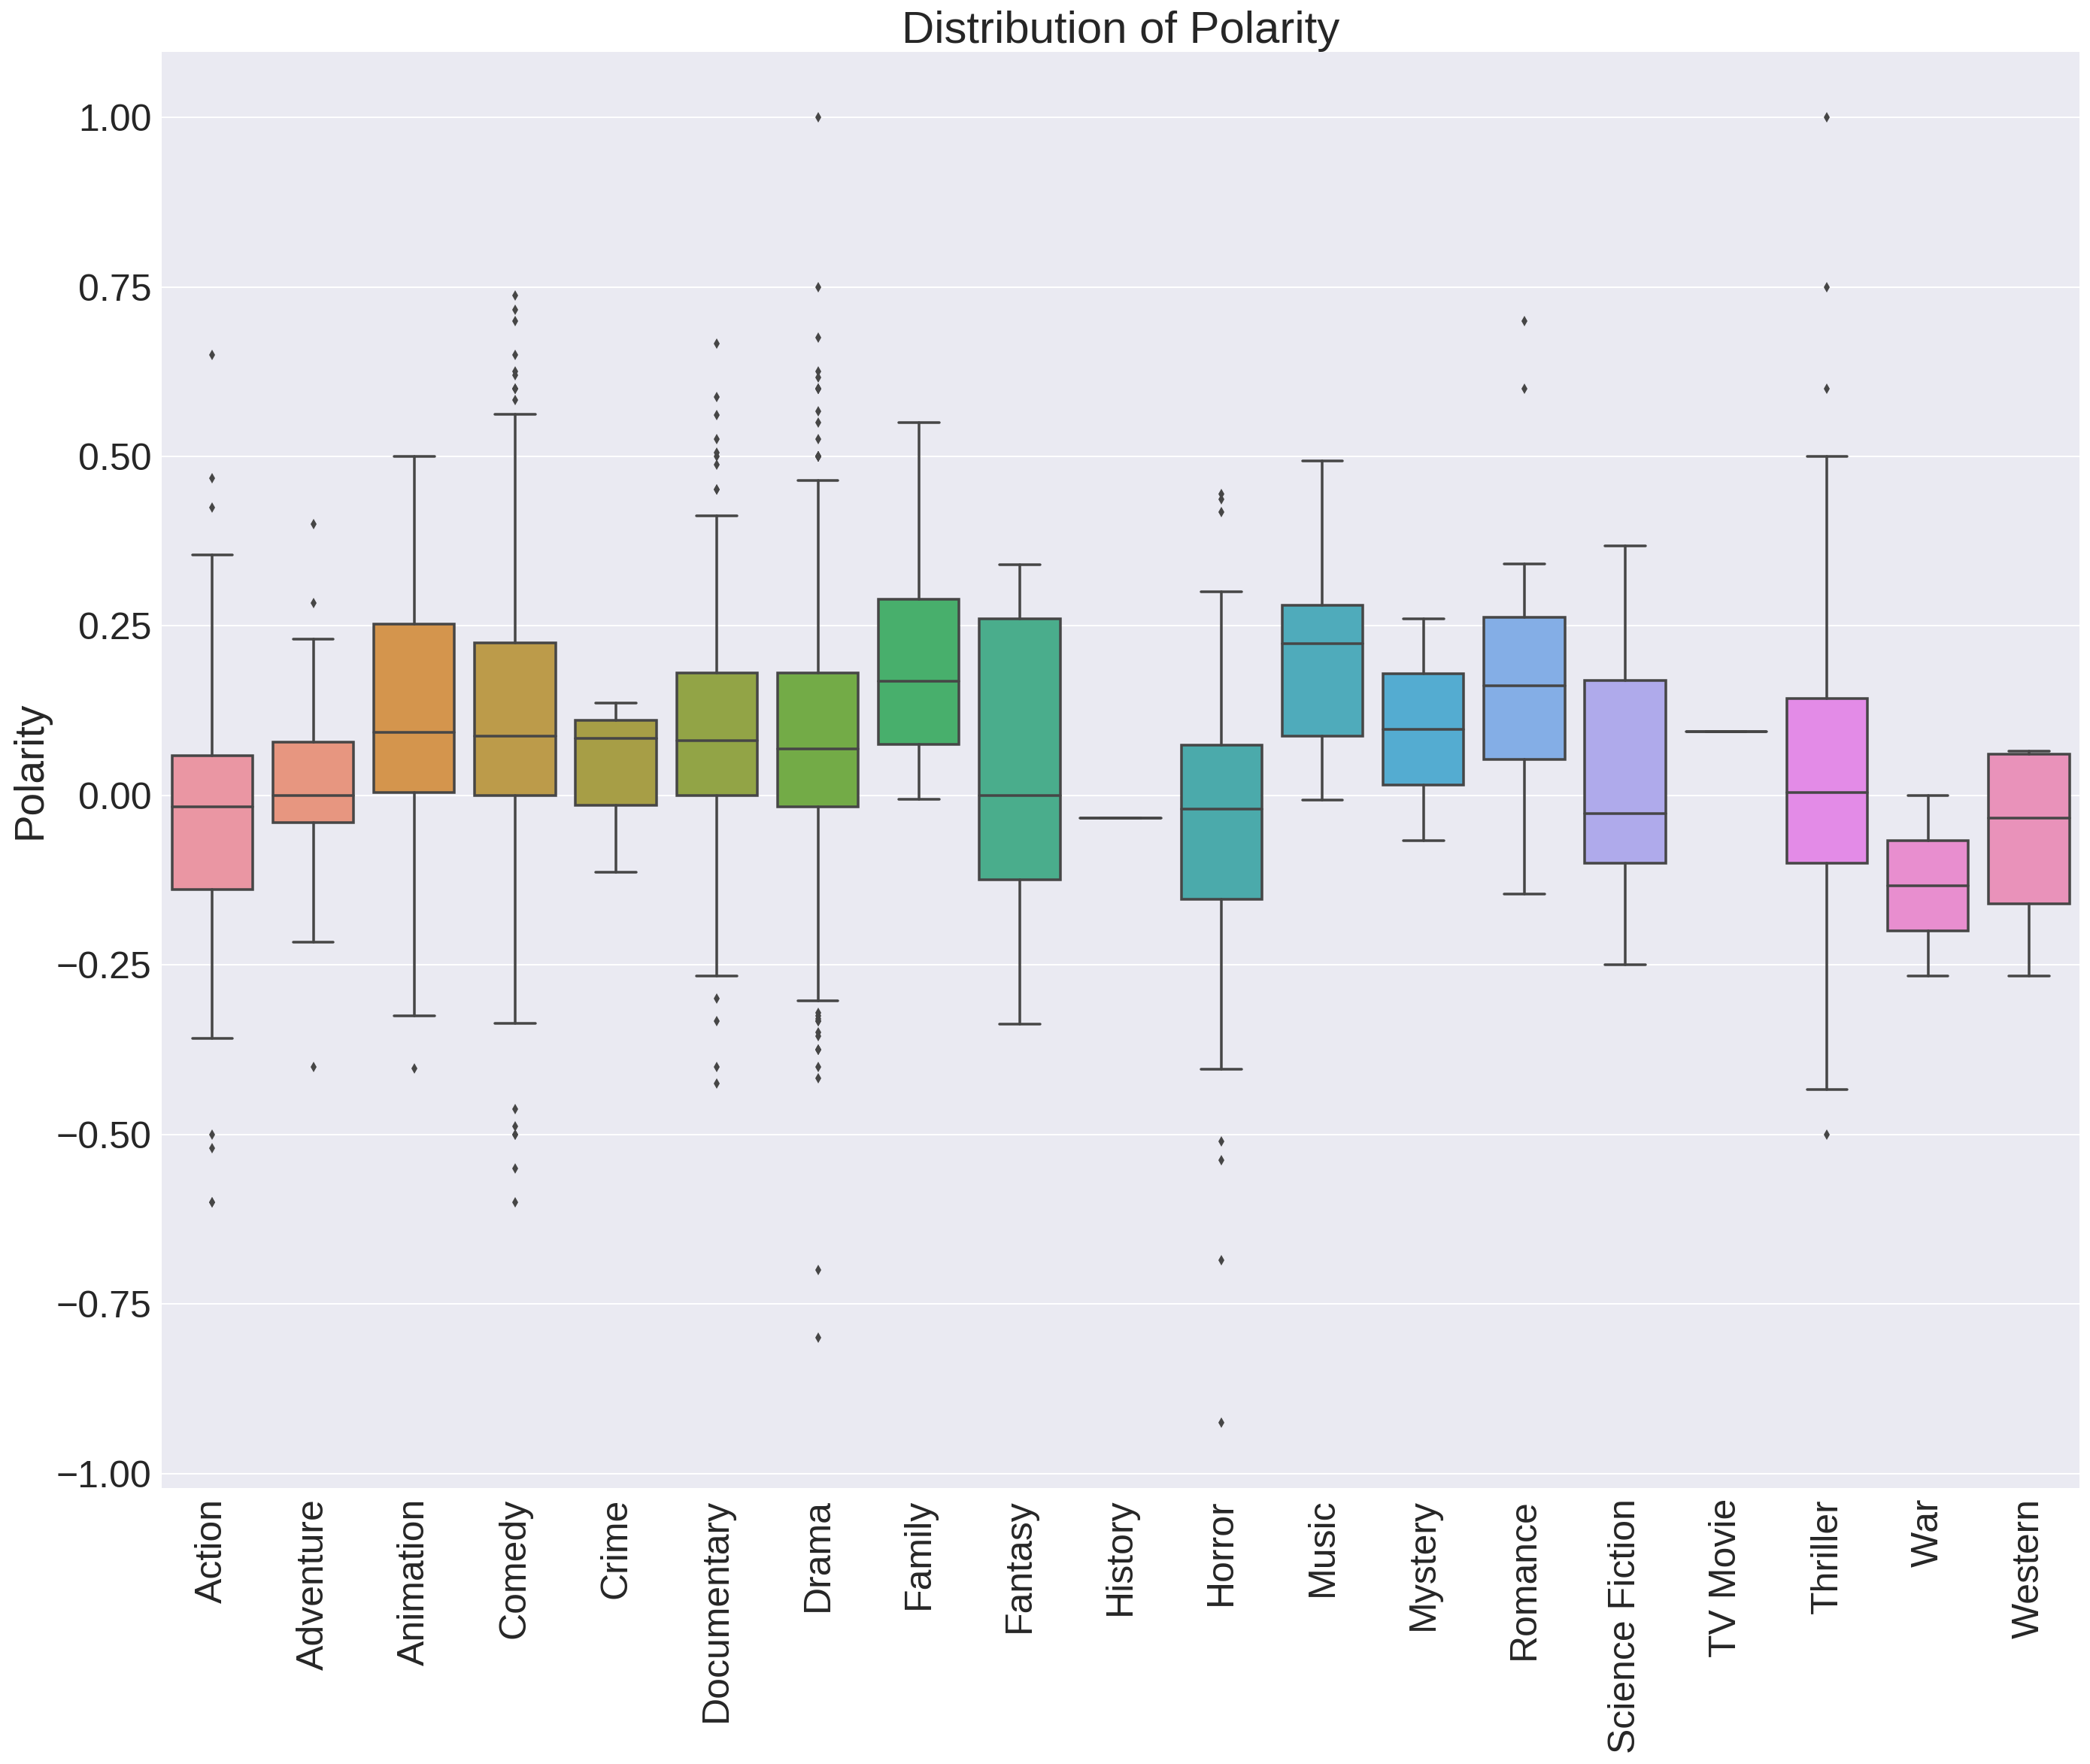

In [13]:
# boxplot of revised polarity distribution per genre 
_, ax1 = plt.subplots(1, 1, figsize=(20, 17))

sns.set(font_scale=2.5)
ax1 = sns.boxplot(data=polarity_mat1)
ax1.set_ylabel('Polarity')
ax1.set_title('Distribution of Polarity')

plt.xticks(range(genres.shape[1]), genres.columns, rotation=90)
plt.tight_layout(); plt.show()